In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tensorflow as tf
import os
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split

In [5]:
data=[]
lables=[]
classes=1
pwd=os.getcwd()

for i in range(classes):
    path=os.path.join(pwd,'train',str(i))
    images=os.listdir(path)
    
    for a in images:
        try:
            image=Image.open(path+'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            lables.append(i)
        except:
            print("Error image loading...")
            
data=np.array(data)
labels=np.array(lables)

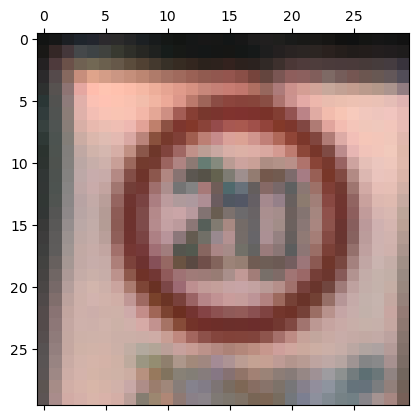

In [6]:
plt.matshow(data[100])

In [18]:
data.shape

(39209, 30, 30, 3)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=12)

In [26]:
y_test

array([34, 24, 38, ..., 32,  8, 27])

In [27]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [31]:
y_train[8]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
x_train.shape[1:]

(30, 30, 3)

In [39]:
history=model.fit(x_train,y_train,batch_size=64,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
491/491 [==============================] - 65s 131ms/step - loss: 2.3708 - accuracy: 0.3965 - val_loss: 0.7655 - val_accuracy: 0.8073
Epoch 2/15
491/491 [==============================] - 54s 111ms/step - loss: 1.0080 - accuracy: 0.7009 - val_loss: 0.4037 - val_accuracy: 0.8849
Epoch 3/15
491/491 [==============================] - 50s 102ms/step - loss: 0.6550 - accuracy: 0.8008 - val_loss: 0.2169 - val_accuracy: 0.9313
Epoch 4/15
491/491 [==============================] - 51s 104ms/step - loss: 0.4446 - accuracy: 0.8640 - val_loss: 0.1411 - val_accuracy: 0.9617
Epoch 5/15
491/491 [==============================] - 52s 106ms/step - loss: 0.3387 - accuracy: 0.8999 - val_loss: 0.0881 - val_accuracy: 0.9763
Epoch 6/15
491/491 [==============================] - 170s 346ms/step - loss: 0.2901 - accuracy: 0.9132 - val_loss: 0.0760 - val_accuracy: 0.9805
Epoch 7/15
491/491 [==============================] - 61s 125ms/step - loss: 0.2300 - accuracy: 0.9327 - val_loss: 0.0641 - val_a

In [46]:
from sklearn.metrics import accuracy_score

y_test=pd.read_csv('Test.csv')

lbl=y_test['ClassId']
imgs=y_test['Path']

d=[]

for i in imgs:
    image=Image.open(i)
    image=image.resize((30,30))
    d.append(np.array(image))
    
x_test=np.array(d)


In [ ]:
pred=model.predict(x_test)

accuracy_score(lbl,pred)

In [57]:
np.argmax(pred[489])

14

In [58]:
lbl[489]

14

In [73]:
model.save('traffic_classifier.h5')

In [74]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Milan Ribadiya\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Milan Ribadiya\AppData\Local\Temp\ipykernel_1416\1753678235.py", line 77, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\Milan Ribadiya\AppData\Local\Temp\ipykernel_1416\1753678235.py", line 71, in classify
    pred = model.predict_classes([image])[0]
AttributeError: 'Sequential' object has no attribute 'predict_classes'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Milan Ribadiya\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Milan Ribadiya\AppData\Local\Temp\ipykernel_1416\1753678235.py", line 77, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File 